# Cleaning tool for DEALS in Hubspot CRM

# Data Gathering

In [566]:
# importing libraries I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [511]:
# importing my dataset
crm_deals = pd.read_csv('toutes-les-transactions.csv')
crm_deals.shape

(7352, 127)

In [512]:
# we have 127 columns, we set up our tool to be able to check them all without slicing our dataframe
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [513]:
# checking our data
crm_deals.head()

,Deal ID,Techno (L33T),Pays / Job Country,Numéro de TVA (si entreprise basée à l'etranger),Closed Won Reason,Tiering,Annual contract value,Last Modified Date,Montant du CA pour le propriétaire du deal / Turnover for the deal owner,ID Répondant Scan,Nom de facturation de l'entreprise (si différent),Montant du CA pour l'apporteur d'affaires,Restitution orale faite,Salaire fixe final (en K€) / Final fixed salary,Pipeline,Croissance / Compétences (Growth / Competencies),Weighted amount in company currency,Motif de Refus / Reason for refusal,Next step,Nom du candidat placé / Name of candidate placed,Nom de l'OPCO du client,Campaign of last booking in meetings tool,(ATTENTION - NE METTRE QUE L'ADRESSE MAIL) Contact à qui envoyer la facture,Forecast probability,Repeat : Outbound VS Inbound,ScanRH_Intitulé_Poste,Close Date,Deal Type,Situation par rapport aux OPCO,Number of times contacted,Number of Sales Activities,Date du placement / Date of placement,Réactivité du client / Client reactivity,Currency,Deal Split Added,Original Source Type,Forecast amount,% du contract / % of the contract,Dupliquer le job ? / Duplicate the job?,Origine du lead (SPINE),Medium of last booking in meetings tool,Create Date,Date du prochain rendez-vous (SPINE),Coach associé au recrutement / Coach associated to the hiring,Date of last meeting booked in meetings tool,Score prévisionnel de l'opport,Linkedin de l'entreprise,Remplacement / Replacement,Type d'accompagnement proposé (SPINE),Statut de la facture d'acompte,Date d'envoi de la facture,Numéro RCS de l'entreprise,Catégorie d'accompagnement (CA),Annual recurring revenue,Salaire variable estimé (en K€) / Estimated variable salary,Lead Delivery,Personne de la team qui a fait la passe (si existant),Echéance de paiement si spécifique,Salaire variable final (en K€) / Final variable salary,Scan - Motif du gain de la transaction,Date d'échéance de la facture d'acompte,Concurrence sur le poste ? / Competition on this position?,Poste du contact ayant rempli Scan RH,bo_job_id,Deal owner,Last Activity Date,Next Activity Date,Source of last booking in meetings tool,Owner Assigned Date,Recrutement en cours ? / Current recruitment ongoing ? (L'entreprise a-t-elle des offres en ligne - avec ou sans nous / with or without us),Nombre de participants à l'atelier / la formation,Lieu d'immatriculation du RCS,Deal Stage,Nombre d'années d'expériences / Years of Experience (jobs),Date d'envoi de la facture d'acompte,Exclusivité / Exclusivity,Number of Associated Contacts,Catégorie métier du job / Job category,Original Source Data 1,Weighted amount,Total contract value,Raison de la perte du job / Job loss reason,Statut de la facturation,Original Source Data 2,Transaction venant de Scan RH,Last Contacted,Facturation contact created in Dendreo,Politique de Remote ?,Deal probability,HubSpot Team,ScanRH_Taille,Must-haves,Montant du CA pour le coach associé / Turnover for the coach,Raison de la perte du deal / Reason of deal loss,Deal Name,Dates de la prestation,Date du dernier jour de la prestation,Amount,La boîte attire-t-elle nos candidats ? / Does the startup attract our candidates?,Nombre de jours de préparation réalisée,Priority,Monthly recurring revenue,Provenance du lead / Lead Source (Convention de recrutement),Salaire fixe estimé (en K€) / Fixed salary estimated,Type de contrat. / Contract type,New / Repeat,Montant du CA à facturer pour l'acompte,Date du 1er Rendez-vous / 1st meeting date (Convention de recrutement / Account Management),Métier / Type of job (jobs),Capacité d’Ignition à répondre au besoin(métier/candidats) ? / Ignition capacity to help,Date du 1er jour de la prestation,Prospection (Convention de recrutement / Account Management),Montant du CA à facturer pour le solde,Deal Description,Détails du calcul,Nombre de jours d'animation réalisés ou à réaliser,Forecast category,Adresse de facturation / Invoicing address,Nombre d'animateurs et co-animateurs Ignition,Amount in company currency,Urgence du recrutement /

In [514]:
crm_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 127 entries, Deal ID to Associated Contacts
dtypes: bool(1), float64(34), int64(1), object(91)
memory usage: 7.1+ MB


In [515]:
crm_deals.dtypes

Deal ID                                                                                                                                          int64
Techno (L33T)                                                                                                                                   object
Pays / Job Country                                                                                                                              object
Numéro de TVA (si entreprise basée à l'etranger)                                                                                                object
Closed Won Reason                                                                                                                               object
Tiering                                                                                                                                         object
Annual contract value                                                                         

# Data Cleaning

Let'start by cleaning column names :

In [516]:
# Turning column names into lower cases
crm_deals.columns = list(map(lambda x: x.lower(), crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno (l33t)', 'pays / job country',
       'numéro de tva (si entreprise basée à l'etranger)', 'closed won reason',
       'tiering', 'annual contract value', 'last modified date',
       'montant du ca pour le propriétaire du deal / turnover for the deal owner',
       'id répondant scan',
       ...
       'adresse de facturation / invoicing address',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency',
       'urgence du recrutement / emergency of the recruitment',
       'commentaire pour hiba',
       'vient du formulaire lead entrant (convention recrutement) / is a inbound lead?',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [517]:
# Deleting not needed informations between parenthesis
import re

def clean_parenthesis(x) :
    x = re.sub(r"\([^()]*\)", "", x)
    x = x.rstrip()
    return x

crm_deals.columns = list(map(clean_parenthesis, crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno', 'pays / job country', 'numéro de tva',
       'closed won reason', 'tiering', 'annual contract value',
       'last modified date',
       'montant du ca pour le propriétaire du deal / turnover for the deal owner',
       'id répondant scan',
       ...
       'adresse de facturation / invoicing address',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency',
       'urgence du recrutement / emergency of the recruitment',
       'commentaire pour hiba',
       'vient du formulaire lead entrant  / is a inbound lead?',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [518]:
# Removing the part after the "/" :
def clean_doubles(x) :
    split_str = x.split("/", 1)
    x = split_str[0]
    x = x.rstrip()
    return x

In [519]:
crm_deals.columns = list(map(clean_doubles, crm_deals.columns))
crm_deals.columns

Index(['deal id', 'techno', 'pays', 'numéro de tva', 'closed won reason',
       'tiering', 'annual contract value', 'last modified date',
       'montant du ca pour le propriétaire du deal', 'id répondant scan',
       ...
       'adresse de facturation',
       'nombre d'animateurs et co-animateurs  ignition',
       'amount in company currency', 'urgence du recrutement',
       'commentaire pour hiba', 'vient du formulaire lead entrant',
       'associated company id', 'associated company', 'associated contact ids',
       'associated contacts'],
      dtype='object', length=127)

In [520]:
# Replacing white spaces by underscores :
def clean_underscore(x) :
    if " " in x :
        return x.replace(" ", "_")
    else : 
        return x

In [521]:
crm_deals.columns = list(map(clean_underscore, crm_deals.columns))
crm_deals.columns

Index(['deal_id', 'techno', 'pays', 'numéro_de_tva', 'closed_won_reason',
       'tiering', 'annual_contract_value', 'last_modified_date',
       'montant_du_ca_pour_le_propriétaire_du_deal', 'id_répondant_scan',
       ...
       'adresse_de_facturation',
       'nombre_d'animateurs_et_co-animateurs__ignition',
       'amount_in_company_currency', 'urgence_du_recrutement',
       'commentaire_pour_hiba', 'vient_du_formulaire_lead_entrant',
       'associated_company_id', 'associated_company', 'associated_contact_ids',
       'associated_contacts'],
      dtype='object', length=127)

In [522]:
# Replacing ' by underscore :
def clean_apostrophe(x) :
    if "'" in x :
        return x.replace("'", "_")
    else : 
        return x

In [523]:
crm_deals.columns = list(map(clean_apostrophe, crm_deals.columns))
crm_deals.columns

Index(['deal_id', 'techno', 'pays', 'numéro_de_tva', 'closed_won_reason',
       'tiering', 'annual_contract_value', 'last_modified_date',
       'montant_du_ca_pour_le_propriétaire_du_deal', 'id_répondant_scan',
       ...
       'adresse_de_facturation',
       'nombre_d_animateurs_et_co-animateurs__ignition',
       'amount_in_company_currency', 'urgence_du_recrutement',
       'commentaire_pour_hiba', 'vient_du_formulaire_lead_entrant',
       'associated_company_id', 'associated_company', 'associated_contact_ids',
       'associated_contacts'],
      dtype='object', length=127)

In [524]:
# Finding out which columns to drop :
(crm_deals.isna().sum()) / (crm_deals.shape[0])

deal_id                                               0.000000
techno                                                0.965860
pays                                                  0.681583
numéro_de_tva                                         0.725109
closed_won_reason                                     0.996328
tiering                                               0.602285
annual_contract_value                                 0.939880
last_modified_date                                    0.000000
montant_du_ca_pour_le_propriétaire_du_deal            0.914581
id_répondant_scan                                     0.974565
nom_de_facturation_de_l_entreprise                    0.681991
montant_du_ca_pour_l_apporteur_d_affaires             0.992655
restitution_orale_faite                               0.985174
salaire_fixe_final                                    0.968988
pipeline                                              0.000000
croissance                                            0

In [525]:
# Creating a dataframe with the % of missing values for each columns
nulls_col = pd.DataFrame(round(crm_deals.isna().sum()/len(crm_deals),4)*100).reset_index()
nulls_col.columns = ['header_name', 'percent_nulls']
nulls_col.head()

,header_name,percent_nulls
0,deal_id,0.00
1,techno,96.59
2,pays,68.16
3,numéro_de_tva,72.51
4,closed_won_reason,99.63


In [526]:
# columns to drop :
columns_drop = nulls_col[nulls_col['percent_nulls']>90]['header_name']  
crm_deals = crm_deals.drop(columns_drop, axis=1)
crm_deals.shape

(7352, 67)

In [527]:
crm_deals.head()

,deal_id,pays,numéro_de_tva,tiering,last_modified_date,nom_de_facturation_de_l_entreprise,pipeline,croissance,weighted_amount_in_company_currency,_contact_à_qui_envoyer_la_facture,forecast_probability,close_date,number_of_times_contacted,number_of_sales_activities,réactivité_du_client,currency,deal_split_added,original_source_type,forecast_amount,_%_du_contract,create_date,score_prévisionnel_de_l_opport,remplacement,date_d_envoi_de_la_facture,numéro_rcs_de_l_entreprise,concurrence_sur_le_poste_?,bo_job_id,deal_owner,last_activity_date,owner_assigned_date,recrutement_en_cours_?,lieu_d_immatriculation_du_rcs,deal_stage,nombre_d_années_d_expériences,exclusivité,number_of_associated_contacts,catégorie_métier_du_job,original_source_data_1,weighted_amount,raison_de_la_perte_du_job,statut_de_la_facturation,original_source_data_2,transaction_venant_de_scan_rh,last_contacted,deal_probability,hubspot_team,raison_de_la_perte_du_deal,deal_name,amount,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,salaire_fixe_estimé,type_de_contrat.,new,date_du_1er_rendez-vous,métier,capacité_d’ignition_à_répondre_au_besoin_?,prospection,forecast_category,adresse_de_facturation,amount_in_company_currency,urgence_du_recrutement,vient_du_formulaire_lead_entrant,associated_company_id,associated_company,associated_contact_ids,associated_contacts
0,9008554681,NaN,NaN,NaN,2022-05-25 18:22,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 18:17,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 18:17,0.0,NaN,NaN,NaN,NaN,NaN,Chloé Marchand,NaN,2022-05-25 18:21,NaN,NaN,Rendez-vous planifié / Meeting booked,NaN,NaN,1.0,NaN,CONTACTS,NaN,NaN,NaN,userId:28478318,Non,NaN,0.4,Les Merines,NaN,Escape - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,NaN,NaN,2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8058317960,Escape,9515251,Tristan Kalos (tristan.kalos@escape.ua)
1,9007207702,NaN,NaN,NaN,2022-05-25 17:34,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 17:30,0.0,1.0,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 17:30,0.0,NaN,NaN,NaN,NaN,NaN,Charlotte GERAUD,NaN,2022-05-25 17:30,NaN,NaN,Rendez-vous planifié / Meeting booked,NaN,NaN,1.0,NaN,CONTACTS,NaN,NaN,NaN,userId:44492086,Non,NaN,0.4,Les MéMER,NaN,CHICHE - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,NaN,NaN,2022-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8781674400,CHICHE,12106801,Coralie Honajzer (coralie@onestchiche.com)
2,9007083660,NaN,NaN,Tiède,2022-05-25 17:18,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 17:17,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 17:17,0.0,NaN,NaN,NaN,NaN,NaN,Charlotte GERAUD,NaN,2022-05-25 17:17,NaN,NaN,Rendez-vous planifié / Meeting booked,NaN,NaN,0.0,NaN,CONTACTS,NaN,NaN,NaN,userId:44492086,Non,NaN,0.4,Les MéMER,NaN,Smileinthelight - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,NaN,NaN,2022-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,8680841808,Smileinthelight,NaN,NaN
3,9005498498,NaN,NaN,Tiède,2022-05-25 15:15,NaN,Convention de recrutement / Recruitment contract,NaN,NaN,NaN,NaN,2022-06-30 15:14,NaN,NaN,NaN,EUR,False,Offline Sources,NaN,NaN,2022-05-25 15:14,0.0,NaN,NaN,NaN,NaN,NaN,Pauline de JENLIS,NaN,2022-05-25 15:14,NaN,NaN,Rendez-vous planifié / Meeting booked,NaN,NaN,0.0,NaN,CONTACTS,NaN,NaN,NaN,CRM_UI,Non,NaN,0.4,Les Merines,NaN,BOTdesign - Prospection,NaN,NaN,Prospection - cold call ou réseau perso / Pros...,NaN,NaN,NaN,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non,5211719455,BOTdesign,NaN,NaN
4,9005302272,NaN,NaN,NaN,2022-05-25 15:48,NaN,Scan RH,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,False,Offline Sources,NaN,NaN,2022-05-25 14:36,0.0,NaN,NaN,NaN,NaN,NaN,Antoine Delaporte,2022-05-25 15:48,2022-05-25 15:30,NaN,NaN,Rendez-vous à planifier,NaN,NaN,1.0,NaN,INTEGRATION,NaN,NaN,NaN,25200,Oui,2022-05-25 15:48,0.5,Maxiteam,NaN,Telequid - Scan RH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [528]:
(crm_deals.isna().sum()) / (crm_deals.shape[0])

deal_id                                       0.000000
pays                                          0.681583
numéro_de_tva                                 0.725109
tiering                                       0.602285
last_modified_date                            0.000000
nom_de_facturation_de_l_entreprise            0.681991
pipeline                                      0.000000
croissance                                    0.605822
weighted_amount_in_company_currency           0.474021
_contact_à_qui_envoyer_la_facture             0.679951
forecast_probability                          0.367111
close_date                                    0.159276
number_of_times_contacted                     0.242655
number_of_sales_activities                    0.242655
réactivité_du_client                          0.727693
currency                                      0.220484
deal_split_added                              0.000000
original_source_type                          0.026795
forecast_a

In [529]:
# Are there any duplicate rows?
crm_deals = crm_deals.drop_duplicates()
crm_deals.shape
# There aren't any duplicates

(7352, 67)

In [530]:
# Other columns will be useless for our analysis, let's drop them. Column concerned =
# numéro_de_tva
# nom_de_facturation_de_l'entreprise
# _contact_à_qui_envoyer_la_facture
# date_d'envoi_de_la_facture
# numéro_rcs_de_l'entreprise
# lieu_d_immatriculation_du_rcs
# bo_job_id
# statut_de_la_facturation
# adresse_de_facturation
# croissance
# forecast_probability (just a proba set up by the sales)
# owner_assigned_date
# currency (all in €)

In [531]:
crm_deals = crm_deals.drop(['numéro_de_tva','nom_de_facturation_de_l_entreprise','_contact_à_qui_envoyer_la_facture', 
                            'date_d_envoi_de_la_facture', 'numéro_rcs_de_l_entreprise', 'bo_job_id',
                           'statut_de_la_facturation', 'adresse_de_facturation', 'lieu_d_immatriculation_du_rcs', 'croissance',
                           'forecast_probability', 'owner_assigned_date', 'currency'], axis=1)

In [532]:
crm_deals.shape

(7352, 54)

In [533]:
# Checking pipelines to decide which ones to keep
crm_deals['pipeline'].value_counts()

Jobs                                                4224
Convention de recrutement / Recruitment contract    2249
Accompagnement RH                                    337
SpineUp                                              232
Scan RH                                              169
Club Bootstrap                                        75
Account Management                                    66
Name: pipeline, dtype: int64

In [534]:
# dropping Scan RH (not useful, marketing lead generation tool) and Account Management (lead nurturing pipeline)
crm_deals = crm_deals[(crm_deals['pipeline'] != 'Scan RH') & (crm_deals['pipeline'] != 'Account Management')]
crm_deals['pipeline'].value_counts()

Jobs                                                4224
Convention de recrutement / Recruitment contract    2249
Accompagnement RH                                    337
SpineUp                                              232
Club Bootstrap                                        75
Name: pipeline, dtype: int64

In [535]:
# Exploring data through deal stage :
crm_deals['deal_stage'].unique()

array(['Rendez-vous planifié / Meeting booked', 'Actif / Active',
       'Besoin pré-identifié / RDV à planifier',
       'Contrat envoyé / Contract sent', 'Gagné / Won - Encaissé / Paid',
       'Gagné / Won', 'Qualification en cours',
       'Gagné - Convention signée / Won - Contract signed',
       'Rendez-vous effectué / Meeting done - En discussions / In discussion',
       'Gagné - Facture envoyée', 'Gagné - Facture encaissée',
       'Contrat / Devis signé', 'Propal envoyée',
       'Gagné / Won - Facture envoyée / Invoice sent', 'Stand-by',
       'Perdu', 'Besoin identifié - Rendez-vous à booker',
       'Proposition commerciale envoyée', 'Perdu / Lost', 'Fermé - Perdu',
       'Gagné / Won - Infos de facturation renseignées / Invoicing info filled',
       'Fermé perdu', 'Devis envoyé', 'Contrat / Devis envoyé',
       'Gagné - Encaissé', 'Devis signé - Gagné',
       'Gagné - 2e facture envoyée', 'Prestation terminée',
       'Gagné - 1e facture envoyée', 'Gagné - Toutes fa

In [536]:
# Creating a new column based on deal stage :
def clean_dealstage(x) :
    if 'Gagné' in x :
        return "Won"
    elif 'Contrat / Devis signé' in x :
        return "Won"
    elif 'Prestation' in x :
        return "Won"
    elif 'Perdu' in x :
        return "Lost"
    elif 'perdu' in x :
        return "Lost"
    else :
        return "On-going"
        

In [537]:
crm_deals['status'] = crm_deals['deal_stage'].apply(clean_dealstage)
crm_deals['status'].value_counts()

Lost        2897
Won         2656
On-going    1564
Name: status, dtype: int64

We are going to take columns one by one to decide what to do with missing values in each column

In [538]:
# Cleaning the column Pays / Country :
crm_deals['pays'].value_counts(dropna = False)

NaN         4777
France      2024
Portugal     155
Spain        136
Other         13
Benelux       12
Name: pays, dtype: int64

In [539]:
crm_deals['hubspot_team'].value_counts(dropna = False)

Les MéMER        1429
Les Merines      1162
Maxiteam         1015
Spine             811
Matchmaking       781
NaN               729
L33T              583
International     421
Bootstrap         175
Coach              11
Name: hubspot_team, dtype: int64

In [540]:
# To clean NaN's in this column, we need to check teams and owners linked to these values 
crm_deals[crm_deals['hubspot_team'] == 'International']['deal_owner'].value_counts(dropna = False)

Bruna Maia           136
Marta Egídio         103
Cécile Roger          74
Vera Cunha            51
María Segura          37
Gabriela Cansinos     20
Name: deal_owner, dtype: int64

In [541]:
# METHOD 3 : .loc -> how to put it into function ?
crm_deals.loc[(crm_deals['pays'].isna() == True) & (crm_deals['hubspot_team'] != 'International'), 'pays'] = "France"
crm_deals.loc[(crm_deals['pays'].isna() == True) & crm_deals['deal_owner'].isin(['Bruna Maia', 'Cécile Roger', 'Vera Cunha']), 'pays'] = "Portugal"
crm_deals.loc[(crm_deals['pays'].isna() == True) & crm_deals['deal_owner'].isin(['Marta Egídio', 'María Segura', 'Gabriela Cansinos']),'pays'] = "Spain"

In [542]:
crm_deals['pays'].value_counts(dropna = False)

France      6689
Portugal     240
Spain        163
Other         13
Benelux       12
Name: pays, dtype: int64

In [543]:
# Let's check again missing values in our dataframe
crm_deals.isna().sum()

deal_id                                          0
pays                                             0
tiering                                       4226
last_modified_date                               0
pipeline                                         0
weighted_amount_in_company_currency           3295
close_date                                    1147
number_of_times_contacted                     1770
number_of_sales_activities                    1770
réactivité_du_client                          5115
deal_split_added                                 0
original_source_type                           182
forecast_amount                               3295
_%_du_contract                                4593
create_date                                      0
score_prévisionnel_de_l_opport                   0
remplacement                                  4364
concurrence_sur_le_poste_?                    5199
deal_owner                                     376
last_activity_date             

In [544]:
# cleaning tiering :
crm_deals['tiering'].value_counts(dropna = False)

# I should use KNN imputer here...

NaN      4226
Hot      1815
Tiède     802
Cold      274
Name: tiering, dtype: int64

In [545]:
crm_deals.loc[(crm_deals['status'] == 'Lost') & (crm_deals['tiering'].isna() == True), 'tiering'] = "Cold"
crm_deals.loc[(crm_deals['status'] == 'Won') & (crm_deals['tiering'].isna() == True), 'tiering'] = "Hot"
crm_deals['tiering'] = crm_deals['tiering'].fillna('Unknown')

    
crm_deals['tiering'].value_counts(dropna = False)

Hot        3755
Cold       1695
Unknown     865
Tiède       802
Name: tiering, dtype: int64

In [546]:
# cleaning "weighted_amount_in_company_currency" :
crm_deals['weighted_amount_in_company_currency'].dtypes

dtype('float64')

AttributeError: module 'matplotlib' has no attribute 'show'

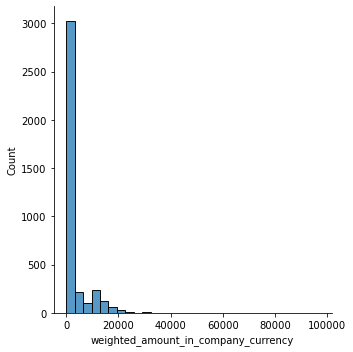

In [547]:
sns.displot(crm_deals['weighted_amount_in_company_currency'], bins = 30)
plt.show()

# It seems there are many outliers in this column : let's use the median to replace NaN's

In [548]:
crm_deals['weighted_amount_in_company_currency'] = crm_deals['weighted_amount_in_company_currency'].fillna(crm_deals['weighted_amount_in_company_currency'].median())
crm_deals['weighted_amount_in_company_currency'].isna().sum()
# How to put it into function : error "cannot convert float NaN to integer" or "'float' object has no attribute 'fillna'"

0

In [ ]:
#def replace_na_median(x) :
    #x = x.fillna(np.median)
    #return x

In [ ]:
#list(map(replace_na_median, crm_deals['weighted_amount_in_company_currency']))

AttributeError: module 'matplotlib' has no attribute 'show'

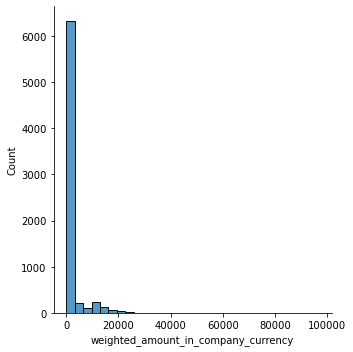

In [549]:
sns.displot(crm_deals['weighted_amount_in_company_currency'], bins = 30)
plt.show()

In [550]:
# Checking again missing values in crm_deals :
crm_deals.isna().sum()

deal_id                                          0
pays                                             0
tiering                                          0
last_modified_date                               0
pipeline                                         0
weighted_amount_in_company_currency              0
close_date                                    1147
number_of_times_contacted                     1770
number_of_sales_activities                    1770
réactivité_du_client                          5115
deal_split_added                                 0
original_source_type                           182
forecast_amount                               3295
_%_du_contract                                4593
create_date                                      0
score_prévisionnel_de_l_opport                   0
remplacement                                  4364
concurrence_sur_le_poste_?                    5199
deal_owner                                     376
last_activity_date             

In [551]:
# Cleaning dates :
print("Data type for last_modified_date is :", crm_deals['last_modified_date'].dtypes)
print("Data type for close_date is :", crm_deals['close_date'].dtypes)
print("Data type for create_date is :", crm_deals['create_date'].dtypes)
print("Data type for last_activity_date is :", crm_deals['last_activity_date'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)
print("Data type for date_du_1er_rendez-vous is :", crm_deals['date_du_1er_rendez-vous'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)

Data type for last_modified_date is : object
Data type for close_date is : object
Data type for create_date is : object
Data type for last_activity_date is : object
Data type for last_contacted is : object
Data type for date_du_1er_rendez-vous is : object
Data type for last_contacted is : object


In [552]:
def clean_dateformat(x) :
    return pd.to_datetime(x, errors = 'coerce')

crm_deals['last_modified_date'] = list(map(clean_dateformat, crm_deals['last_modified_date']))
crm_deals['close_date'] = list(map(clean_dateformat, crm_deals['close_date']))
crm_deals['create_date'] = list(map(clean_dateformat, crm_deals['create_date']))
crm_deals['last_activity_date'] = list(map(clean_dateformat, crm_deals['last_activity_date']))
crm_deals['last_contacted'] = list(map(clean_dateformat, crm_deals['last_contacted']))
crm_deals['date_du_1er_rendez-vous'] = list(map(clean_dateformat, crm_deals['date_du_1er_rendez-vous']))
crm_deals['last_contacted'] = list(map(clean_dateformat, crm_deals['last_contacted']))

In [553]:
print("Data type for last_modified_date is :", crm_deals['last_modified_date'].dtypes)
print("Data type for close_date is :", crm_deals['close_date'].dtypes)
print("Data type for create_date is :", crm_deals['create_date'].dtypes)
print("Data type for last_activity_date is :", crm_deals['last_activity_date'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)
print("Data type for date_du_1er_rendez-vous is :", crm_deals['date_du_1er_rendez-vous'].dtypes)
print("Data type for last_contacted is :", crm_deals['last_contacted'].dtypes)

Data type for last_modified_date is : datetime64[ns]
Data type for close_date is : datetime64[ns]
Data type for create_date is : datetime64[ns]
Data type for last_activity_date is : datetime64[ns]
Data type for last_contacted is : datetime64[ns]
Data type for date_du_1er_rendez-vous is : datetime64[ns]
Data type for last_contacted is : datetime64[ns]


In [554]:
crm_deals.close_date.mean()

Timestamp('2021-11-13 06:40:36.723618048')

In [ ]:
# Would be better to use KNN ?

AttributeError: module 'matplotlib' has no attribute 'show'

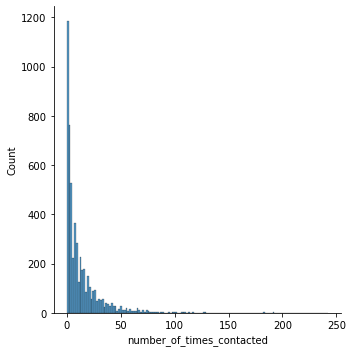

In [555]:
# Cleaning 'number_of_times_contacted' :
sns.displot(crm_deals['number_of_times_contacted'])
plt.show()

In [ ]:
# It seems there are many outliers : let's fill NA's with the median

In [556]:
crm_deals['number_of_times_contacted'] = crm_deals['number_of_times_contacted'].fillna(crm_deals['number_of_times_contacted'].median())
crm_deals['number_of_times_contacted'].isna().sum()

0

AttributeError: module 'matplotlib' has no attribute 'show'

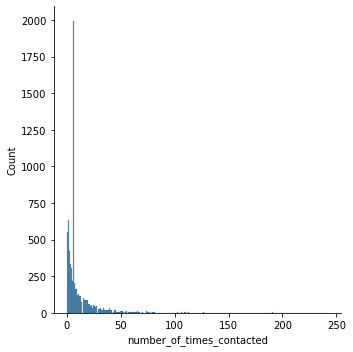

In [557]:
sns.displot(crm_deals['number_of_times_contacted'])
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

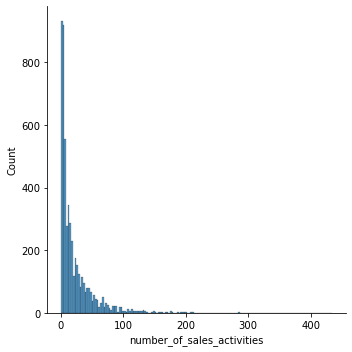

In [558]:
# Cleaning number_of_sales_activities :
sns.displot(crm_deals['number_of_sales_activities'])
plt.show()

In [559]:
crm_deals['number_of_sales_activities'] = crm_deals['number_of_sales_activities'].fillna(crm_deals['number_of_sales_activities'].median())
crm_deals['number_of_sales_activities'].isna().sum()

0

AttributeError: module 'matplotlib' has no attribute 'show'

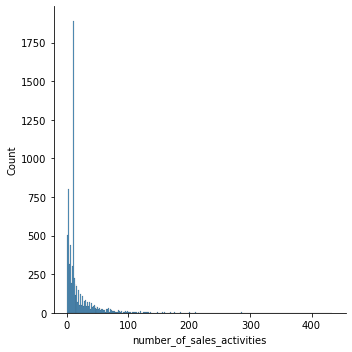

In [560]:
sns.displot(crm_deals['number_of_sales_activities'])
plt.show()

In [561]:
crm_deals['réactivité_du_client'].value_counts(dropna = False)

NaN               5115
Bonne / Good      1739
Mauvaise / Bad     263
Name: réactivité_du_client, dtype: int64

In [ ]:
# KNN OR DROP ???

In [562]:
# cleaning original_source_type :
crm_deals['original_source_type'].value_counts(dropna = False)
# considering the distribution of this variable, let's replace NaN's by the mode : offline sources

Offline Sources    6361
Direct Traffic      464
NaN                 182
Organic Search       61
Paid Search          31
Organic Social        9
Referrals             6
Other Campaigns       3
Name: original_source_type, dtype: int64

In [563]:
crm_deals['original_source_type'] = crm_deals['original_source_type'].fillna('Offline Sources')

In [564]:
crm_deals['original_source_type'].value_counts(dropna = False)

Offline Sources    6543
Direct Traffic      464
Organic Search       61
Paid Search          31
Organic Social        9
Referrals             6
Other Campaigns       3
Name: original_source_type, dtype: int64

In [565]:
# Let's check again missing values to see where we are :
crm_deals.isna().sum()

deal_id                                          0
pays                                             0
tiering                                          0
last_modified_date                               0
pipeline                                         0
weighted_amount_in_company_currency              0
close_date                                    1147
number_of_times_contacted                        0
number_of_sales_activities                       0
réactivité_du_client                          5115
deal_split_added                                 0
original_source_type                             0
forecast_amount                               3295
_%_du_contract                                4593
create_date                                      0
score_prévisionnel_de_l_opport                   0
remplacement                                  4364
concurrence_sur_le_poste_?                    5199
deal_owner                                     376
last_activity_date             

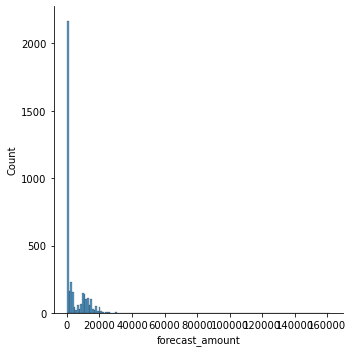

In [567]:
# cleaning forecast amount
sns.displot(crm_deals['forecast_amount'])
plt.show()
# using the median because of outliers

In [568]:
crm_deals['forecast_amount'] = crm_deals['forecast_amount'].fillna(crm_deals['forecast_amount'].median())
crm_deals['forecast_amount'].isna().sum()

0

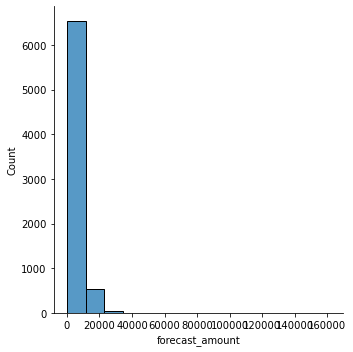

In [569]:
sns.displot(crm_deals['forecast_amount'])
plt.show()

In [570]:
# _%_du_contract 
crm_deals['_%_du_contract'].value_counts(dropna = False)

NaN         4593
25.0        1969
22.0         202
18.0          97
20.0          86
15.0          41
23.0          40
17.0          37
0.0           14
12.5          10
22.5           8
21.0           7
2010.0         2
221000.0       2
16.0           2
25123.0        1
221.0          1
24.0           1
2523.0         1
265.0          1
25000.0        1
14000.0        1
Name: _%_du_contract, dtype: int64

In [ ]:
# Let's drop

In [ ]:
# Then we need to group values from different columns into one new column :
new_col = []
for i in range(len(pokemon['Type 2'])):
    if pd.isna(pokemon['Type 2'][i]) == False :
        new_col.append(str(pokemon['Type 1'][i]) + "-" + str(pokemon['Type 2'][i]))
    else : 
        new_col.append(str(pokemon['Type 1'][i]))
        
# raison_de_la_perte_du_job & raison_de_la_perte_du_deal

In [24]:
# Splitting our dataframes into pipeline dataframes :
#crm_deals.pipeline.unique()

# Here we will group : 
# convention de recrutement + account management 
# spineup + accompagnement RH
# then jobs, scan RH and club bootstrap will be separated dataframes

array(['Convention de recrutement / Recruitment contract', 'Scan RH',
       'Jobs', 'SpineUp', 'Accompagnement RH', 'Club Bootstrap',
       'Account Management'], dtype=object)